# ADMN5006 - Analytics for Financial Markets

## Assignment #1

<p>Your assignment is to design and develop machine learning models for corporate bankruptcy prediction 2 years into the future using the data provided. </p>
   - The column “BK” in the data provided denotes whether the company goes bankrupt (indicated by 1) 2 years in the future, or not (indicated by 0). 
   - Some of the input variables included are “Assets Growth”, “Sales Growth”, “Earnings-per-share (EPS)”, “Return-on-equity (ROE)”, etc. 
   - In addition, the paper entitled: “Machine learning models and bankruptcy prediction” by Barboza et. al. is posted to the portal and is an excellent reference for you to use.  
    
<p>Note however that the dataset you are given is not the same as the one used in the aforementioned paper.  Therefore, don’t be alarmed if your results don’t agree with the Barboza et. al. paper.  You will need to partition your data into testing and training sets and explain your experimental set-up.</p>

<p>The input and output variables are described below:</p>

- EPS – Earnings Per Share
- Liquidity – Working Capital/Total Assets
- Profitability – Retained Earnings/Total Assets
- Productivity – EBIT/Total Assets
- Leverage Ratio – (Total Long-term debt + Debt in Current liabilities)/Stockholders Equity
- Asset Turnover – Sales/ Total Assets
- Operational Margin – EBIT/Sales
- Market Book Ratio – (Price Close Annual Fiscal * Common Shares Outstanding)/Book Value Per Share
- Asset Growth – Change in assets from previous year
- Sales Growth – Change in sales from previous year
- Employee Growth – Change in employees from previous year
- Tobin’s Q – (Total market value of company + liabilities)/ (Total asset or book value + liabilities)
- BK – Company bankrupt or not


    

## 1. Stage One

### 1.1 Inventory resources
    - Personnel: Luke, Jad, Rita, Sreehari, Arnab, Varun
    - Data: Bankruptcy_data_Final.xlsx
    - Computing resources:  Machine Learning (Random Forest, SVC, Naive Bayes)
    - Software: Jupyter Notebook

## 2. Stage Two

### 2.1 Initial Data Report

In [5]:
# Import Libraries Required
#working with the data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats
import seaborn as sns

#for pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

#computing resources
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [94]:
#Data source: 
#Source Query location: 
path =  'Bankruptcy_data_Final.xlsx'
# reads the data from the file - denotes as CSV, it has no header, sets column headers
#df =  pd.read_csv(path, sep=',')
df = pd.read_excel(path)

### 2.2 Describe Data

In [7]:
df.columns

Index(['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio',
       'Asset Turnover', 'Operational Margin', 'Return on Equity',
       'Market Book Ratio', 'Assets Growth', 'Sales Growth', 'Employee Growth',
       'BK'],
      dtype='object')

In [36]:
df.shape

(92872, 13)

In [37]:
df.dtypes

EPS                   float64
Liquidity             float64
Profitability         float64
Productivity          float64
Leverage Ratio        float64
Asset Turnover        float64
Operational Margin    float64
Return on Equity      float64
Market Book Ratio     float64
Assets Growth         float64
Sales Growth          float64
Employee Growth       float64
BK                      int64
dtype: object

In [8]:
df.describe()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
count,92867.000000,92625.000000,92625.000000,92625.000000,92846.000000,92625.000000,87315.000000,92864.000000,9.281500e+04,86171.000000,86171.000000,85862.000000,92872.000000
mean,-14.461355,-2.631237,-29.537274,-1.222870,1.345316,1.053613,-7.915485,-2.112382,3.585063e+02,1.294075,1.900108,0.343322,0.006008
std,2195.467288,121.610921,677.230667,35.885556,253.038093,2.115945,214.460079,352.596902,2.606364e+04,73.769522,177.632638,14.074156,0.077280
min,-384000.000000,-25968.520000,-79682.000000,-5093.000000,-7811.000000,-31.590000,-30175.700000,-88875.140000,-3.151500e+06,-1.000000,-27.431034,-1.000000,0.000000
25%,-0.140000,0.020000,-0.640000,-0.060000,0.000000,0.390000,-0.030000,-0.080000,1.120000e+01,-0.052596,-0.033522,-0.048107,0.000000
50%,0.330000,0.190000,0.070000,0.060000,0.280000,0.830000,0.060000,0.030000,5.828000e+01,0.051844,0.059733,0.017241,0.000000
75%,1.530000,0.400000,0.310000,0.110000,0.820000,1.390000,0.140000,0.070000,2.401400e+02,0.192062,0.204231,0.130944,0.000000
max,55339.000000,1.000000,140.580000,1102.000000,75970.380000,276.380000,394.470000,39500.000000,3.455419e+06,14231.000000,39850.000000,2699.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 92867 non-null  float64
 1   Liquidity           92625 non-null  float64
 2   Profitability       92625 non-null  float64
 3   Productivity        92625 non-null  float64
 4   Leverage Ratio      92846 non-null  float64
 5   Asset Turnover      92625 non-null  float64
 6   Operational Margin  87315 non-null  float64
 7   Return on Equity    92864 non-null  float64
 8   Market Book Ratio   92815 non-null  float64
 9   Assets Growth       86171 non-null  float64
 10  Sales Growth        86171 non-null  float64
 11  Employee Growth     85862 non-null  float64
 12  BK                  92872 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.2 MB


In [40]:
df.head(5)

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


In [97]:
#count of Bankruptcy and non Bankruptcy
df['BK'].value_counts()

0    92314
1      558
Name: BK, dtype: int64

### 2.3 Check Data Validity

#### 2.3.1 Check Missing Data

In [41]:
df.isnull().sum()

EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64

In [105]:
def missing_values_table(df):
    #Code Description: Attempt to show the missing values in the table
    #Input: Dataframe
    #Output: missing value table rendered columns
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [43]:
missing_values_table(df) #it really depends

Your selected dataframe has 13 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
Employee Growth,7010,7.5
Assets Growth,6701,7.2
Sales Growth,6701,7.2
Operational Margin,5557,6.0
Liquidity,247,0.3
Profitability,247,0.3
Productivity,247,0.3
Asset Turnover,247,0.3
Market Book Ratio,57,0.1
Leverage Ratio,26,0.0


In [44]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 13 columns.
There are 12 columns that have missing values.
We will remove 0 columns.


##### No need to drop columns in the Dataframe

### Add data to missing Values

In [106]:
imputer = KNNImputer(n_neighbors=5)
train_data = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
print("added values to missing values using imputer")

added values to missing values using imputer


In [134]:
missing_values_table(train_data) 
train_data.isnull().sum()#check missing values

Your selected dataframe has 13 columns.
There are 0 columns that have missing values.


EPS                   0
Liquidity             0
Profitability         0
Productivity          0
Leverage Ratio        0
Asset Turnover        0
Operational Margin    0
Return on Equity      0
Market Book Ratio     0
Assets Growth         0
Sales Growth          0
Employee Growth       0
BK                    0
dtype: int64

In [107]:
train_data.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,0.111757,-0.002385,0.057881,0.0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0.0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0.0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0.0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0.0


#### 2.3.2 Check Outliers and remove them?

In [45]:
# Task: Check for Outliers per Column and determine what to do with it.
# check: https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm 
# for more information
#    Below the first quartile − 3 ∗ interquartile range
#    Above the third quartile + 3 ∗ interquartile range

In [108]:
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

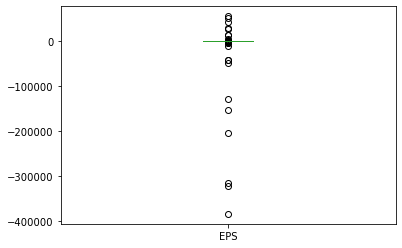

In [109]:
plot_boxplot(train_data,'EPS')

In [20]:
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 - 1.5 * IQR
    ls = df.index[(df[col] < lower_bound) | (df[col]> upper_bound)]
    return ls

In [59]:
train_describe_std = train_data.describe().loc['std',:]

In [72]:
extreme_cols = train_describe_std[train_describe_std>10000].index.values
regular_cols = [col for col in train_data.columns[:-1]if col not in extreme_cols]

<AxesSubplot:>

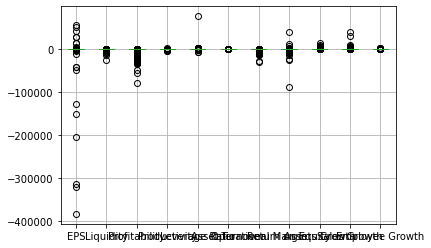

In [73]:
train_data.loc[:,regular_cols].boxplot()

<AxesSubplot:>

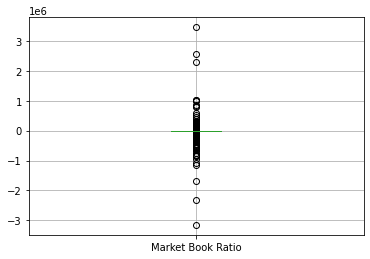

In [66]:
train_data.loc[:,extreme_cols].boxplot()

(array([92314.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   558.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

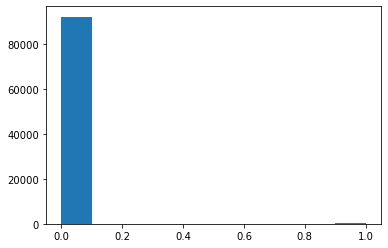

In [75]:
plt.hist(train_data.iloc[:,-1])

In [118]:
copy_data = train_data

In [119]:
copy_data

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.580000,0.360000,0.180000,0.130000,1.330000,1.770000,0.070000,0.150000,2.220000,0.111757,-0.002385,0.057881,0.0
1,1.410000,0.360000,0.190000,0.120000,1.310000,1.590000,0.070000,0.130000,2.410000,0.126319,0.014278,0.040179,0.0
2,0.310000,0.320000,0.130000,0.080000,1.030000,1.550000,0.050000,0.040000,2.560000,0.368077,0.327909,0.566524,0.0
3,0.710000,0.280000,0.140000,0.080000,0.800000,1.390000,0.060000,0.050000,5.280000,-0.020809,-0.118904,-0.095890,0.0
4,0.750000,0.410000,0.130000,0.080000,0.200000,1.300000,0.060000,0.040000,8.680000,0.233089,0.146807,0.053030,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92865,-0.358336,-0.064598,-0.139986,-0.012580,1.548588,0.136766,-0.091980,-0.175655,-311.774624,11.124344,10.125858,4.454545,0.0
92866,-1.468547,-0.013103,-0.565395,-0.245705,5.768961,0.364629,-0.673847,-8.158593,-8.924311,-0.347987,0.738326,-0.133333,0.0
92868,-1.807630,0.093838,-1.204734,-0.121122,-4.530214,0.215844,-0.561155,-4.519074,-2.474549,-0.201835,-0.010544,-0.208333,0.0
92869,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,-0.324286,-0.569448,3274.505633,-0.168001,-0.020206,-0.105263,0.0


In [124]:
def drop_numerical_outliers(df, z_thresh=3):
    print('Before dropping outliers: ', df.shape)
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constraints = df.iloc[:,:-1].select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, False) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constraints], inplace=True)
    print('After dropping outliers: ', df.shape)

In [125]:
drop_numerical_outliers(copy_data)

Before dropping outliers:  (91108, 13)
After dropping outliers:  (85262, 13)


<AxesSubplot:>

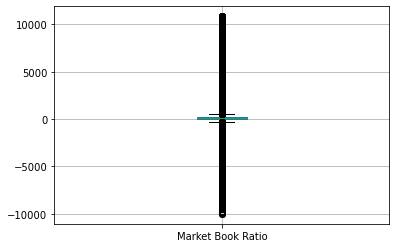

In [127]:
copy_data.loc[:,extreme_cols].boxplot()

<AxesSubplot:>

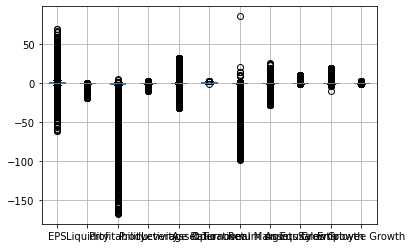

In [128]:
copy_data.loc[:,regular_cols].boxplot()

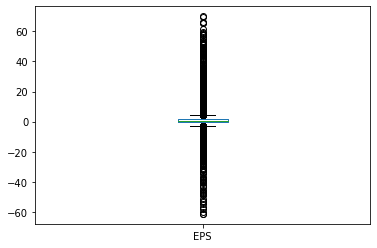

In [131]:
plot_boxplot(copy_data,'EPS')

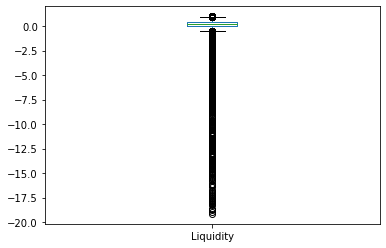

In [132]:
plot_boxplot(copy_data,'Liquidity')

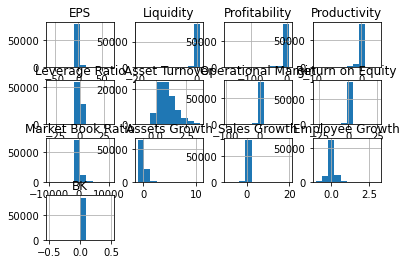

In [134]:
copy_data.hist()
plt.show()

### 2.3.1 Dealing with imbalanced data

In [ ]:
# pip install plotly --quiet
# pip install cufflinks --quiet

# if you haven't downloaded these 

In [ ]:
import plotly.express as px
import cufflinks as cf

df['Employee Growth'].iplot()

In [10]:
{column: len(df[column].unique()) for column in df.columns} # check if all are unique

{'EPS': 6988,
 'Liquidity': 6109,
 'Profitability': 9364,
 'Productivity': 6076,
 'Leverage Ratio': 6937,
 'Asset Turnover': 5052,
 'Operational Margin': 7486,
 'Return on Equity': 5751,
 'Market Book Ratio': 50337,
 'Assets Growth': 85605,
 'Sales Growth': 80351,
 'Employee Growth': 49533,
 'BK': 2}

All data are unique

## 2.4 Initial Data Exploration

### 2.41 Distributions

In [100]:
def count_values_table(df):
        count_val = df.value_counts()
        count_val_percent = 100 * df.value_counts() / len(df)
        count_val_table = pd.concat([count_val, count_val_percent.round(1)], axis=1)
        count_val_table_ren_columns = count_val_table.rename(
        columns = {0 : 'Count Values', 1 : '% of Total Values'})
        return count_val_table_ren_columns

In [94]:
# Histogram
def hist_chart(df, col):
        plt.style.use('fivethirtyeight')
        plt.hist(df[col].dropna(), edgecolor = 'k');
        plt.xlabel(col); plt.ylabel('Number of Entries');
        plt.title('Distribution of '+col);

Count Values  \
EPS      Liquidity Profitability Productivity Leverage Ratio Asset Turnover Operational Margin Return on Equity Market Book Ratio Assets Growth Sales Growth Employee Growth BK                 
2.43      0.05      0.24          0.09         0.75          0.55            0.17               0.08             43.69             0.067080      0.018128     0.026830       0              2   
2.28      0.00      0.12          0.10         1.04          0.33            0.29               0.08             265.59            0.032411      0.072050    -0.011426       0              2   
3.66     -0.01      0.13          0.08         0.78          0.49            0.16               0.10             16.70             0.069080     -0.253067    -0.199961       0              2   
2.37      0.06      0.24          0.09         0.82          0.58            0.16               0.08             40.08             0.063709      0.058621     0.034496       0              2   
2.67     -0.07      0.10          0.11         0.90          0.76            0.14               0.10             12.19            -0.060779     -0.268154    -0.344557       0              2   
...                                                                                                                                                                                       ...   
0.00     -1.02     -64.83        -0.84        -1.04          0.73           -1.15              -0.85            -3786.32          -0.017893     -0.153846     0.000000       0              1   
         -1.04     -9.14         -0.76        -2.49          0.62           -1.22              -3.55            -22.28            -0.135593     -0.509690    -0.080952       0              1   
                   -193.63       -5.52         0.00          0.70           -7.84              -0.13            -11653.16         -0.908947     -0.820000    -0.931818       0              1   
         -1.05     -7.82         -3.25        -1.58          3.34           -0.97              -0.42            -3519.17          -0.791356      0.019608    -0.230769       0              1   
55339.00  0.10      0.00          0.15         14.79         0.86            0.17               813.81           0.00              0.575813      0.068859    -0.210938       0              1   

                                                                                                                                                                                 % of Total Values  
EPS      Liquidity Profitability Productivity Leverage Ratio Asset Turnover Operational Margin Return on Equity Market Book Ratio Assets Growth Sales Growth Employee Growth BK                     
2.43      0.05      0.24          0.09         0.75          0.55            0.17               0.08             43.69             0.067080      0.018128     0.026830       0                 0.0  
2.28      0.00      0.12          0.10         1.04          0.33            0.29               0.08             265.59            0.032411      0.072050    -0.011426       0                 0.0  
3.66     -0.01      0.13          0.08         0.78          0.49            0.16               0.10             16.70             0.069080     -0.253067    -0.199961       0                 0.0  
2.37      0.06      0.24          0.09         0.82          0.58            0.16               0.08             40.08             0.063709      0.058621     0.034496       0                 0.0  
2.67     -0.07      0.10          0.11         0.90          0.76            0.14               0.10             12.19            -0.060779     -0.268154    -0.344557       0                 0.0  
...                                                                                                                                                                                            ...  
0.00     -1.02     -64.83        -0.84        -1.04          0.73           -1.15          

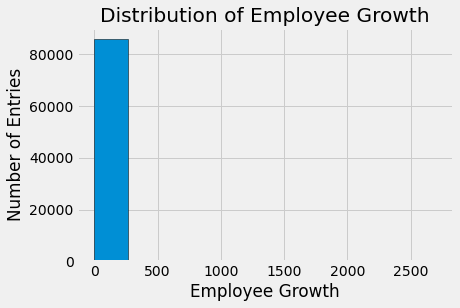

In [101]:
# This is just an Example
col = 'Employee Growth'
# Histogram & Results
hist_chart(df, col)
count_values_table(df)

### 2.4.2 Correlations

#### Differencing

In [66]:
# use seaborn and heatmap to show correlation

## 2.5 Data Quality Report

    -List the results of the data quality verification. If quality problems exist, suggest possible solutions. Solutions to data quality problems generally depend heavily on both data and business knowledge.

# Stage 3 - Data Preperation

In [52]:
# Initialize variables for Data inclusion/exclusion

## 3.2 Clean The Data

### 3.2.1 Label Encoding

In [96]:
# help? : http://pbpython.com/categorical-encoding.html
# Data has fitted headers already

### 3.2.2 Drop Unnecessary Columns

In [54]:
# This is the code for deleting columns
# del_col_list = ['col1', 'col2']

# df = df.drop(del_col_list, axis=1)
# df.head()

### 3.2.3 Altering Data Types

In [141]:
#df['date'] = pd.to_datetime(df['date'])
train_data['BK'] = pd.to_numeric(train_data['BK'], downcast="integer")
train_data['BK']

0        0
1        0
2        0
3        0
4        0
        ..
92867    0
92868    0
92869    0
92870    0
92871    1
Name: BK, Length: 92872, dtype: int8

In [ ]:
# All Data types has been manages

###  3.2.4 Dealing With Zeros

In [56]:
#cols = ['col1', 'col2']
#df[cols] = df[cols].replace(0, np.nan)

In [57]:
# dropping all the rows with na in the columns mentioned above in the list.

# df.dropna(subset=cols, inplace=True)

### 3.2.5 Dealing With Duplications

In [58]:
#df = df.drop_duplicates(keep='first')

In [ ]:
# No neeed to deal with duplications

## 3.3 Construct Required Data

This task includes constructive data preparation operations such as the production of derived attributes or entire new records, or transformed values for existing attributes.

- Derived attributes - These are new attributes that are constructed from one or more existing attributes in the same record, for example you might use the variables of length and width to calculate a new variable of area.

- Generated records - Here you describe the creation of any completely new records. For example you might need to create records for customers who made no purchase during the past year. There was no reason to have such records in the raw data, but for modelling purposes it might make sense to explicitly represent the fact that particular customers made zero purchases.

In [143]:
def preprocess_inputs(df):
    df = df.copy()
    
    #split df into X and Y
    y = df['BK']
    X = df.drop('BK',axis =1)
    
    #train test split
    X_train,X_test,y_train,y_test= train_test_split(X, y, train_size = 0.7, shuffle = True, random_state = 1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train),index=X_train.index, columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test),index=X_test.index, columns = X_test.columns)
    return X_train, X_test, y_train, y_test

In [136]:
X_train, X_test, y_train, y_test = preprocess_inputs(train_data)

In [137]:
X_train

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
6187,0.007439,0.027687,0.048868,0.046460,-0.006082,0.084516,0.046834,0.006600,-0.012869,-0.016442,-0.010225,-0.021713
92428,0.007646,0.022823,0.048240,0.047057,0.002308,-0.149714,0.047085,0.006693,-0.012631,-0.014290,-0.001298,-0.034426
80813,0.007212,-0.005661,-0.004208,0.015175,-0.006847,1.154203,0.045374,0.005578,-0.018566,-0.007724,0.004290,-0.027579
29167,0.006919,0.021942,0.048100,0.045076,0.002102,0.235369,0.046663,0.005720,-0.013122,-0.017147,-0.010742,-0.033492
17680,0.013464,0.023554,0.048265,0.045907,0.005230,-0.272047,0.046920,0.006671,-0.009380,-0.015215,-0.009746,-0.030908
...,...,...,...,...,...,...,...,...,...,...,...,...
21440,0.007549,0.024744,0.048580,0.046460,-0.005417,0.020517,0.046834,0.006576,-0.004858,-0.015056,-0.009594,-0.018036
73349,0.002587,0.023203,0.048032,0.047014,0.012549,0.793069,0.046791,0.000989,-0.012468,-0.018616,-0.011432,-0.038027
50057,0.007741,0.021522,0.049183,0.048398,-0.005417,-0.144050,0.047350,0.006600,-0.012052,-0.015328,-0.010103,-0.027579
5192,0.006105,0.025935,0.048333,0.044522,0.002435,0.166799,0.046620,0.005482,-0.013143,-0.014832,-0.009648,-0.033833


In [144]:
y_train

6187     0.0
92428    0.0
80813    0.0
29167    0.0
17680    0.0
        ... 
21440    0.0
73349    0.0
50057    0.0
5192     0.0
77708    0.0
Name: BK, Length: 65010, dtype: float64

# Stage 4 - Exploratory Data Analysis
## Modelling

As the first step in modelling, you'll select the actual modelling technique that you'll be using. Although you may have already selected a tool during the business understanding phase, at this stage you'll be selecting the specific modelling technique e.g. decision-tree building with C5.0, or neural network generation with back propagation. If multiple techniques are applied, perform this task separately for each technique.

## 4.1 Modelling technique
Document the actual modelling technique that is to be used.
    
    Import Models Below:

In [113]:
models = {
    "Random Forest": RandomForestClassifier(),
    "SVC (RBF Kernel)": SVC(),
    "Naive Bayes" : GaussianNB()
}

## 4.2 Modelling Assumption
Many modelling techniques make specific assumptions about the data, for example that all attributes have uniform distributions, no missing values allowed, class attribute must be symbolic etc. Record any assumptions made.

- The train size is 70%
- For missing data: KNNImputer was used with K = 5 Neighbor to fit into the missing value
- For Extreme Outliers: 

## 4.3 Build Model
Run the modelling tool on the prepared dataset to create one or more models.

- Parameter settings - With any modelling tool there are often a large number of parameters that can be adjusted. List the parameters and their chosen values, along with the rationale for the choice of parameter settings.

- Models - These are the actual models produced by the modelling tool, not a report on the models.

- Model descriptions - Describe the resulting models, report on the interpretation of the models and document any difficulties encountered with their meanings.

In [114]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name+ " trained.")

Random Forest trained.
SVC (RBF Kernel) trained.
Naive Bayes trained.


In [129]:
results = []
for name, model in models.items():
    result = model.score(X_test,y_test)
    results.append(result)
    print(name+ ": {:.2f}%".format(result*100))
    

Random Forest: 99.41%
SVC (RBF Kernel): 99.41%
Naive Bayes: 6.77%


## 5.4 Assess Model 
<p>Interpret the models according to your domain knowledge, your data mining success criteria and your desired test design. Judge the success of the application of modelling and discovery techniques technically, then contact business analysts and domain experts later in order to discuss the data mining results in the business context. This task only considers models, whereas the evaluation phase also takes into account all other results that were produced in the course of the project.</p>

At this stage you should rank the models and assess them according to the evaluation criteria. You should take the business objectives and business success criteria into account as far as you can here. In most data mining projects a single technique is applied more than once and data mining results are generated with several different techniques.

- **Model assessment** - Summarise the results of this task, list the qualities of your generated models (e.g.in terms of accuracy) and rank their quality in relation to each other.

- **Revised parameter settings** - According to the model assessment, revise parameter settings and tune them for the next modelling run. Iterate model building and assessment until you strongly believe that you have found the best model(s). Document all such revisions and assessments.